In [1]:
# 11/04/21
# 0|1
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform
import math
pi = math.pi

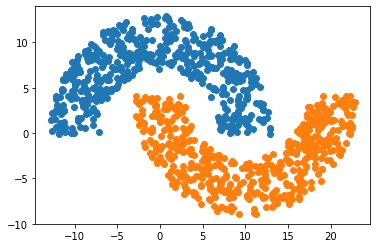

In [2]:
# Problem 1

N_1 = 0
N_2 = 0
N_3 = 0

x_1 = []
y_1 = []

x_2 = []
y_2 = []


while (N_1 < 500):
    x = uniform(-13.1,13.1)
    y = uniform(-0.1,13.1)
    if (y*y + x*x <= 169) & (y*y + x*x >= 49):
        x_1.append(x)
        y_1.append(y)
        N_1+=1

while (N_2 < 500):
    x = uniform(-3.1,23.1)
    y = uniform(-9.1,4.1)
    if ((y-4)*(y-4) + (x-10)*(x-10) <= 169) & ((y-4)*(y-4) + (x-10)*(x-10) >= 49):
        x_2.append(x)
        y_2.append(y)
        N_2+=1

        
# different colors to refer to different clusters        
plt.scatter(x_1, y_1)      
plt.scatter(x_2, y_2)

In [3]:
# Helper functions for part 2

# Find Euclidian distance between vector w and (x, y)
def get_distance(w, x, y):
    dist_square = (w[0] - x)*(w[0] - x) + (w[1] - y)*(w[1] - y)
    return math.sqrt(dist_square)

# Find the closest wector w for point located at (x, y)
def closest_weight(W, x, y):
    dist = 1000
    w_min = [0,0]
    for w in W:
        if (get_distance(w,x,y) < dist):
            w_min = w
            dist = get_distance(w,x,y)
    return w_min

# Calculate loss function
def Loss(W, x, y):
    E = 0
    for j in range(len(x)):
        w_closest = closest_weight(W, x[j], y[j])
        E += 0.5*get_distance(w_closest, x[j], y[j])*get_distance(w_closest, x[j], y[j])
    return E

In [4]:
# Problem 2 

def two_clusters(epoch_num):
    
    x = x_1 + x_2
    y = y_1 + y_2
    
    w_1 = [uniform(-5, 5), uniform(-5,5)]
    w_2 = [uniform(-5, 5), uniform(-5,5)]

    W = [w_1, w_2]

    etha = 0.1
    #delta_etha = 0.05
    error = []
    epoch = []

    for i in range(epoch_num):
        for j in range(len(x)):
                w_min = closest_weight(W, x[j], y[j])

                if (w_min == W[0]):
                    W[0][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[0][1] = w_min[1] + etha * (y[j] - w_min[1])  
                else:
                    W[1][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[1][1] = w_min[1] + etha * (y[j] - w_min[1])

        if (i%50==0):
            etha = etha/2

        if (i%10==0):
            error.append(Loss(W, x, y))
            epoch.append(i)
            
    plot1 = plt.figure(1)
    
    for w in W:                
        plt.scatter(w[0], w[1], marker='x', color = 'black')
    plt.scatter(x, y)

    for i in range(len(x)):

        w_min = closest_weight(W, x[i], y[i])

        if (w_min == W[0]):
            plt.scatter(x[i], y[i], color ='red')
        else:
            plt.scatter(x[i], y[i], color ='blue')
            
    plot2 = plt.figure(2)
    plt.plot(epoch, error)
    plt.show()
    
def three_clusters(epoch_num):
    
    # make all data together
    x = x_1 + x_2
    y = y_1 + y_2
    
    # initialize weights randomly in some range 
    w_1 = [uniform(-5, 5), uniform(-5,5)]
    w_2 = [uniform(-5, 5), uniform(-5,5)]
    w_3 = [uniform(-5, 5), uniform(-5,5)]
    
    # store them in one list
    W = [w_1, w_2, w_3]
    
    # parameter and storage arrays
    etha = 0.1
    error = []
    epoch = []
    
    # make the leaning in epoch_num iterations
    for i in range(epoch_num):
        # for each point find closest weight and update it
        for j in range(len(x)):
                w_min = closest_weight(W, x[j], y[j])

                if (w_min == W[0]):
                    W[0][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[0][1] = w_min[1] + etha * (y[j] - w_min[1])      
                elif (w_min == W[1]):
                    W[1][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[1][1] = w_min[1] + etha * (y[j] - w_min[1])      
                else:
                    W[2][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[2][1] = w_min[1] + etha * (y[j] - w_min[1])
        
        # change learning rate parameter every 50 iterations
        if (i%50==0):
            etha = etha/2
        
        # calculate and store loss every 10 iterations
        if (i%10==0):
            error.append(Loss(W, x, y))
            epoch.append(i)
            
    plot1 = plt.figure(1)
    # plot weight to show cluster centers
    for w in W:                
        plt.scatter(w[0], w[1], marker='x', color = 'black')

    # plot clusters with corresponding colors for each
    for i in range(len(x)):
        w_min = closest_weight(W, x[i], y[i])

        if (w_min == W[0]):
            plt.scatter(x[i], y[i], color ='red')
        elif (w_min == W[1]):
            plt.scatter(x[i], y[i], color ='green')
        else:
            plt.scatter(x[i], y[i], color ='blue')
            
    plot2 = plt.figure(2)
    plt.plot(epoch, error)
    plt.show()


def four_clusters(epoch_num):
    x = x_1 + x_2
    y = y_1 + y_2

    w_1 = [uniform(-5, 5), uniform(-5,5)]
    w_2 = [uniform(-5, 5), uniform(-5,5)]
    w_3 = [uniform(-5, 5), uniform(-5,5)]
    w_4 = [uniform(-5, 5), uniform(-5,5)]

    W = [w_1, w_2, w_3, w_4]

    etha = 0.1
    error = []
    epoch = []

    for i in range(epoch_num):
        for j in range(len(x)):
                w_min = closest_weight(W, x[j], y[j])

                if (w_min == W[0]):
                    W[0][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[0][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[1]):
                    W[1][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[1][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[2]):
                    W[2][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[2][1] = w_min[1] + etha * (y[j] - w_min[1])
                else:
                    W[3][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[3][1] = w_min[1] + etha * (y[j] - w_min[1])

        if (i%50==0):
            etha = etha/2

        if (i%10==0):
            error.append(Loss(W, x, y))
            epoch.append(i)
    
    plot1 = plt.figure(1)
    
    for w in W:                
        plt.scatter(w[0], w[1], marker='x', color = 'black')

    for i in range(len(x)):
        w_min = closest_weight(W, x[i], y[i])

        if (w_min == W[0]):
            plt.scatter(x[i], y[i], color ='red')
        elif (w_min == W[1]):
            plt.scatter(x[i], y[i], color ='green')
        elif (w_min == W[2]):
            plt.scatter(x[i], y[i], color ='pink')
        else:
            plt.scatter(x[i], y[i], color ='blue')
            
    plot2 = plt.figure(2)
    plt.plot(epoch, error)
    plt.show()
    
def eight_clusters(epoch_num):
    x = x_1 + x_2
    y = y_1 + y_2

    w_1 = [uniform(-5, 5), uniform(-5,5)]
    w_2 = [uniform(-5, 5), uniform(-5,5)]
    w_3 = [uniform(-5, 5), uniform(-5,5)]
    w_4 = [uniform(-5, 5), uniform(-5,5)]
    w_5 = [uniform(-5, 5), uniform(-5,5)]
    w_6 = [uniform(-5, 5), uniform(-5,5)]
    w_7 = [uniform(-5, 5), uniform(-5,5)]
    w_8 = [uniform(-5, 5), uniform(-5,5)]

    W = [w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8]

    etha = 0.1
    error = []
    epoch = []

    for i in range(epoch_num):
        for j in range(len(x)):
                w_min = closest_weight(W, x[j], y[j])

                if (w_min == W[0]):
                    W[0][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[0][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[1]):
                    W[1][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[1][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[2]):
                    W[2][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[2][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[3]):
                    W[3][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[3][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[4]):
                    W[4][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[4][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[5]):
                    W[5][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[5][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[6]):
                    W[6][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[6][1] = w_min[1] + etha * (y[j] - w_min[1])     
                else: 
                    W[7][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[7][1] = w_min[1] + etha * (y[j] - w_min[1])   
                        
        if (i%50==0):
            etha = etha/2

        if (i%10==0):
            error.append(Loss(W, x, y))
            epoch.append(i)
    
    plot1 = plt.figure(1)
    
    for w in W:                
        plt.scatter(w[0], w[1], marker='x', color = 'black')

    for i in range(len(x)):
        w_min = closest_weight(W, x[i], y[i])

        if (w_min == W[0]):
            plt.scatter(x[i], y[i], color ='red')
        elif (w_min == W[1]):
            plt.scatter(x[i], y[i], color ='green')
        elif (w_min == W[2]):
            plt.scatter(x[i], y[i], color ='pink')
        elif (w_min == W[3]):
            plt.scatter(x[i], y[i], color ='blue')
        elif (w_min == W[4]):
            plt.scatter(x[i], y[i], color ='yellow')
        elif (w_min == W[5]):
            plt.scatter(x[i], y[i], color ='black')
        elif (w_min == W[6]):
            plt.scatter(x[i], y[i], color ='gray')   
        else:
            plt.scatter(x[i], y[i], color ='purple')
        
    plot2 = plt.figure(2)
    plt.plot(epoch, error)
    plt.show()

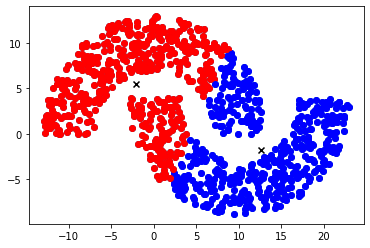

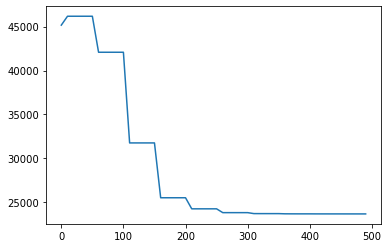

In [8]:
two_clusters(500)

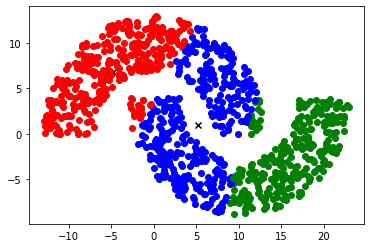

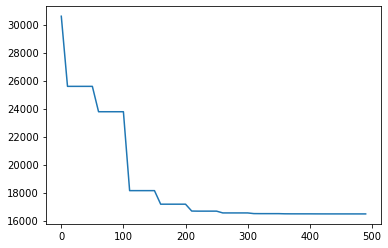

In [10]:
three_clusters(500)

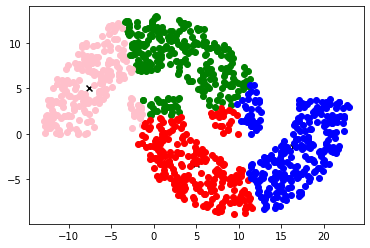

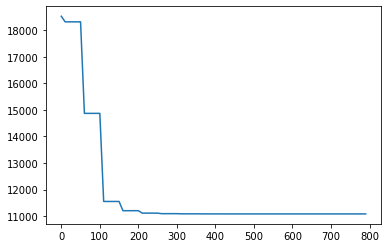

In [11]:
four_clusters(800)

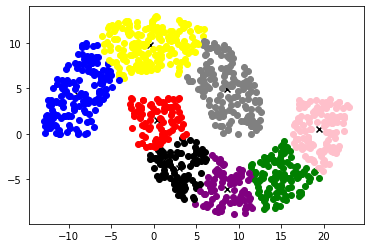

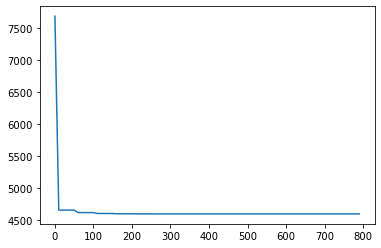

In [12]:
eight_clusters(800)

In [8]:
# Helper fucnitons for creating perceptron in part c

# Initialize a network
def initialize(n_in):
    network = list()
    for i in range(n_in + 1): # each neuron is connected with each other and there is bias
        network.append(0)
    return network
 
# Calculate neuron activation for an input
def activation(weights, inputx, inputy):

    output = weights[0]*inputx + weights[1]*inputy + weights[2]
    return 1 if output>0 else -1


    
# Forward propagate input to a network output
def forward_propagation(network, inputx, inputy):
    output = []
    for i in range(len(inputx)):
        activ = activation(network, inputx[i], inputy[i])
        output.append(activ)
    return output
 

# Backpropagate error and store in neurons
def backward_propagation(network, desired, output, inputx, inputy, etha):
    #error = 0
    for i in range(len(desired)):
        error = (desired[i]-output[i])
        network[0] = network[0] + etha*error*inputx[i]
        network[1] = network[1] + etha*error*inputy[i]
        network[2] = network[2] + etha*error
    return network
 

# Train a network for a fixed number of epochs
def train(network, data, l_rate, n_epoch):
    L = []
    epoch_num = []
    for epoch in range(n_epoch):
        loss = 0
        desired = []
        inputx = []
        inputy = []
        for i in range(len(data)):
            desired.append(data[i][2])
            inputx.append(data[i][0])
            inputy.append(data[i][1])
        output = forward_propagation(network, inputx, inputy)
        loss += (sum([0.5*(desired[i]-output[i])**2 for i in range(len(desired))]))
        network = backward_propagation(network, desired, output, inputx, inputy, l_rate)
        L.append(loss)
        epoch_num.append(epoch)
    plot2 = plt.figure(2)
    plt.plot(epoch_num, L, linestyle='solid' )
    plt.show()


In [22]:
# Problem 4
def perceptron(learning_rate, epoch):
    # use data classes
    data = []

    for i in range(500):
        data.append([x_1[i],y_1[i],1])
        data.append([x_2[i],y_2[i],-1])


    network = initialize(2)
    train(network, data, learning_rate, epoch)

    print("The weight values are:")
    for layer in network:
        print(layer)

    x = []
    y = []
    xi = -15
    while xi<25:
        yi = (-network[2] - network[0]*xi)/network[1]
        x.append(xi)
        y.append(yi)
        xi+=0.2

    plt.scatter(x_1,y_1)
    plt.scatter(x_2,y_2)
    plt.plot(x,y)

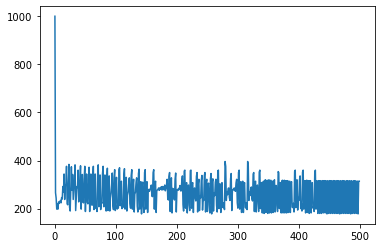

The weight values are:
-170.83385854824536
1240.8701714414044
-1538.9999999999493


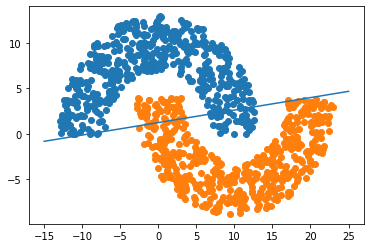

In [23]:
perceptron(0.3, 500)

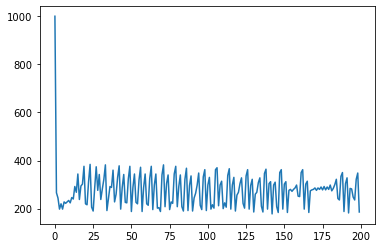

The weight values are:
-43.359037744900306
2192.9930046835334
-2624.3999999999673


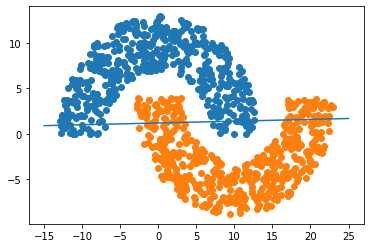

In [24]:
perceptron(0.6, 200)

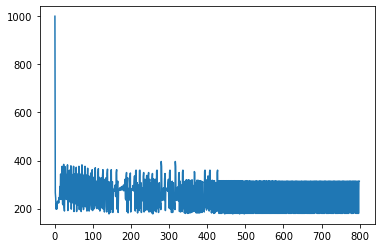

The weight values are:
-55.570885441005366
416.17674987014965
-526.7999999999828


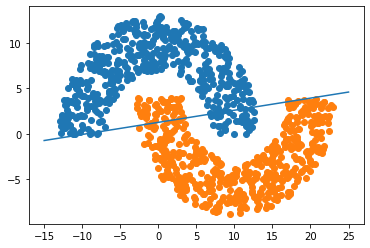

In [25]:
perceptron(0.1, 800)

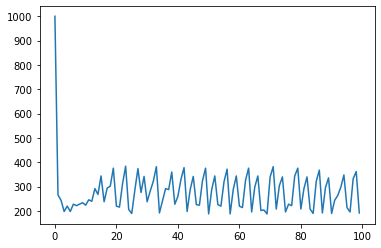

The weight values are:
41.9034820715447
2923.3613548637873
-2731.1999999999134


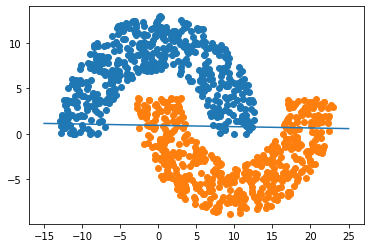

In [26]:
perceptron(0.8, 100)

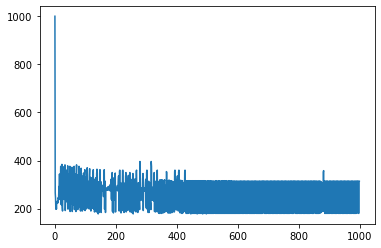

The weight values are:
-28.221001867975502
207.81971978491495
-263.3999999999914


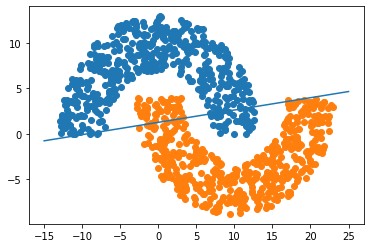

In [27]:
perceptron(0.05, 1000)

In [11]:
# Problem 5

def random_initialize(n_in):
    network = list()
    for i in range(n_in + 1): # each neuron is connected with each other and there is bias
        network.append(uniform(-5,5))
    return network

def random_perceptron(learning_rate, epoch):
    # use data classes
    data = []

    for i in range(500):
        data.append([x_1[i],y_1[i],1])
        data.append([x_2[i],y_2[i],-1])


    network = random_initialize(2)
    train(network, data, learning_rate, epoch)

    print("The weight values are:")
    for layer in network:
        print(layer)

    x = []
    y = []
    xi = -15
    while xi<25:
        yi = (-network[2] - network[0]*xi)/network[1]
        x.append(xi)
        y.append(yi)
        xi+=0.2

    plt.scatter(x_1,y_1)
    plt.scatter(x_2,y_2)
    plt.plot(x,y)

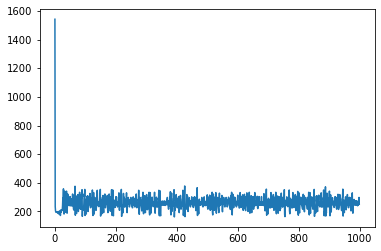

The weight values are:
-101.31492683631436
167.3547662655432
-163.5340633750121


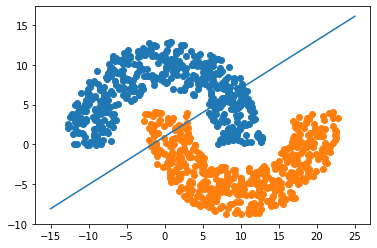

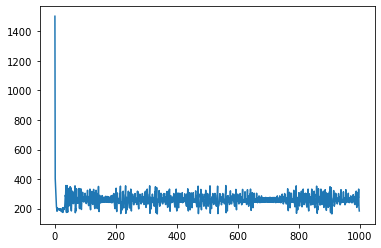

The weight values are:
2.174340457367122
177.61347577705004
-154.92228319408275


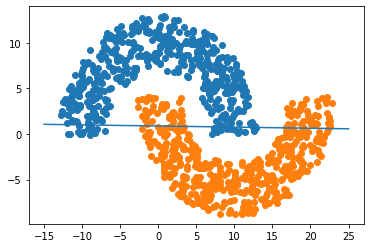

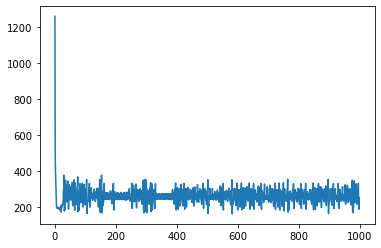

The weight values are:
-101.15922896651873
155.0069104450386
-162.482361499835


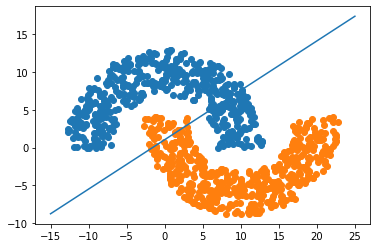

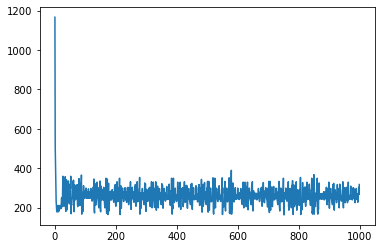

The weight values are:
-5.410829496260325
195.45075313469655
-152.01817624765863


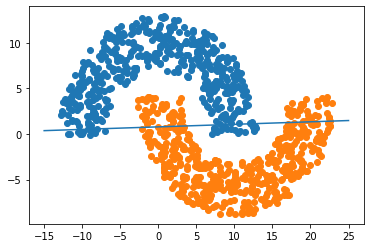

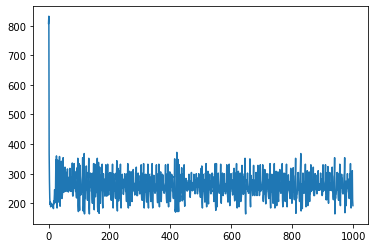

The weight values are:
1.150382875029376
176.49355790879088
-158.23963838160049


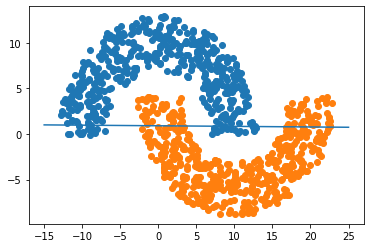

In [12]:
for i in range(5):
    random_perceptron(0.05, 1000)

In [3]:
# Problem 6
# Helper fucnitons for creating multiple layer perceptron 


# sigmoid activation function
def sigmoid(x):
    if x>100:
        return 1
    if x<-100:
        return 0
    return 1/(1+math.exp(-x))

# RelU activation function
def RelU(x):
    if (x>0):
        return x
    else:
        return 0

# we need derivatives of activation functions
def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def der_RelU(x):
    if (x>0):
        return 1
    else:
        return 0
    
# which function to apply
def f(x, fun):
    if (fun == "sigmoid"): 
        return sigmoid(x)
    elif(fun == "RelU"):
        return RelU(x)
    else:
        print("error, no such activation function exists") 
        return
    
# which derivative function to apply
def der_f(x, fun):
    if (fun == "sigmoid"): 
        return der_sigmoid(x)
    elif(fun == "RelU"):
        return der_RelU(x)
    else:
        print("error, no such activation function exists") 
        return



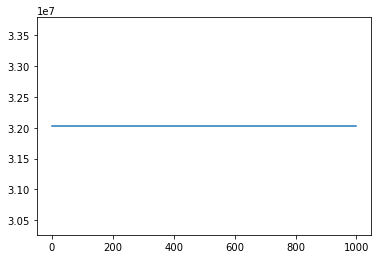

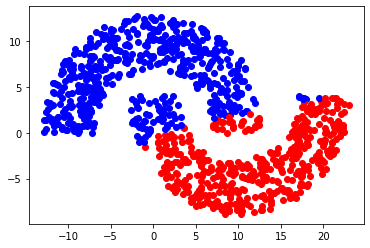

In [447]:
two_neuron_hidden_layer_perc_RelU(1000, 0.03)

In [13]:
# Problem 6
# general signle layer perceptron 
def hidden_layer_perc(epoch, lr, n, fun):
    
    # use data classes
    data = []
    desired = []
    Loss = []
    epoch_num = []
    A = 1
    B = 0
    for i in range(500):
        data.append([x_1[i],y_1[i]])
        desired.append(A)
        data.append([x_2[i],y_2[i]])
        desired.append(B)
    w1 = []
    w2 = []
    
    output = []
    y_hat = []
    h_hat = []
    h = []
    
    # initialize network
    for i in range(n):
        w2.append(uniform(-5, 5))
        
    for j in range(2):
        w = []
        for i in range(n):
            w.append(uniform(-5, 5))
        w1.append(w)

    # training loop
    for l in range(epoch): 
        # forward propagation
        for i in range(len(data)):
            inputx = data[i]
            layer = []
            sig = []
            for i in range(len(w2)):
                signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
                sig.append(signal)
                layer.append(f(signal, fun))
            res = 0
            for i in range(len(w2)):
                res+=layer[i]*w2[i]
            out = f(res, fun)
            output.append(out)
            y_hat.append(res)
            h.append(layer)
            h_hat.append(sig)

        # backward propagation
        for i in range(len(data)):
            loss = 0
            error = desired[i] - output[i]
            delta2 = der_f(y_hat[i], fun)*error
            for j in range(len(w2)):
                w2[j] = w2[j] + lr*h[i][j]*delta2
            for j in range(len(w1[0])):
                delta1 = delta2*w2[j]*der_f(h_hat[i][j], fun)
                for k in range(len(w1)):
                    w1[k][j] = w1[k][j] + lr*inputx[k]*delta1

        # caclulate loss at this epoch
        loss = 0
        loss += (sum([0.5*(desired[i]-output[i])**2 for i in range(len(desired))]))
        Loss.append(loss)
        epoch_num.append(l)

    plot2 = plt.figure(2)
    plt.plot(epoch_num, Loss, linestyle='solid' )
    plt.show()
    
    # print data
    if fun == "sigmoid":
        limit = 0.5
    else:
        limit = 0
    for i in range(len(data)):
        if output[i] > limit:
            plt.scatter(data[i][0],data[i][1], color ='red')
        else:
            plt.scatter(data[i][0],data[i][1], color ='blue')
    

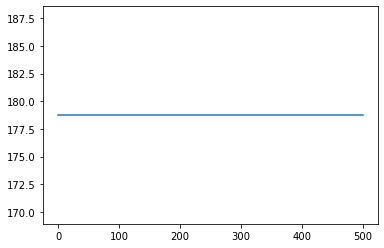

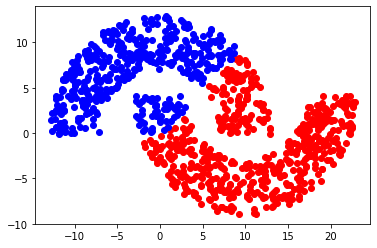

In [22]:
# to check the perfomance
hidden_layer_perc(500, 0.08, 2, "sigmoid")

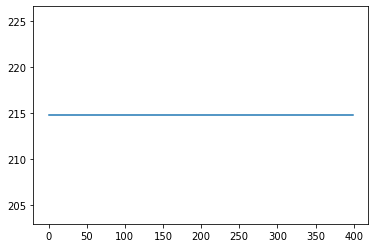

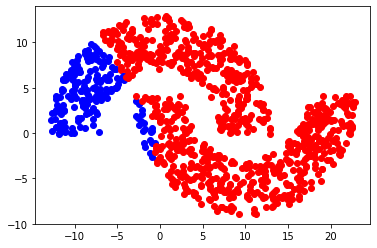

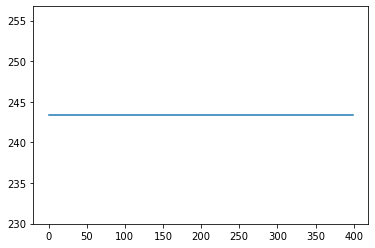

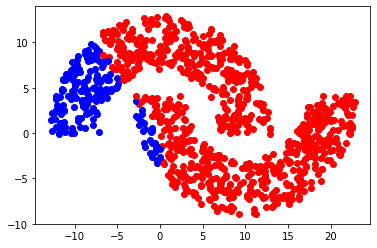

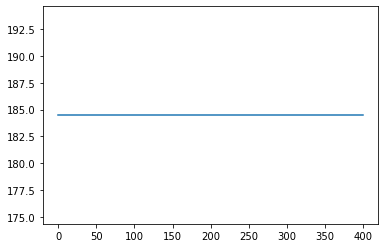

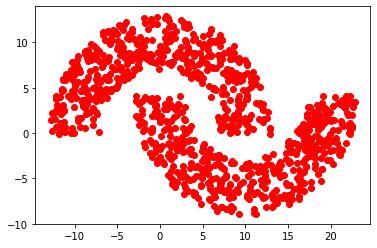

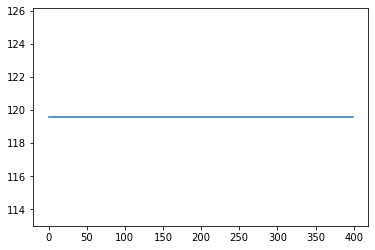

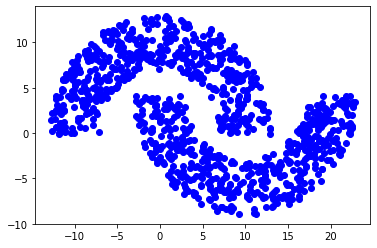

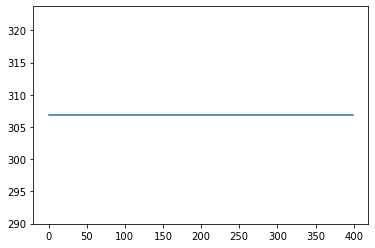

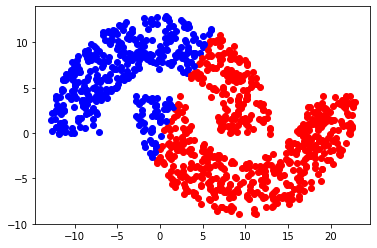

In [28]:
for i in range(5):
    hidden_layer_perc(400, 0.09, 2, "sigmoid")

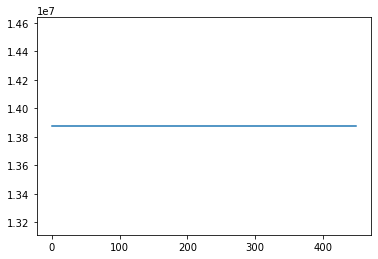

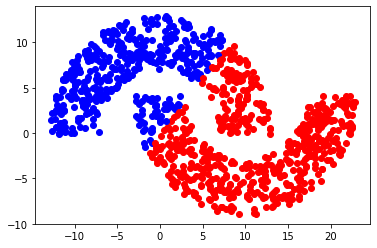

In [33]:
hidden_layer_perc(450, 0.09, 2, "RelU")

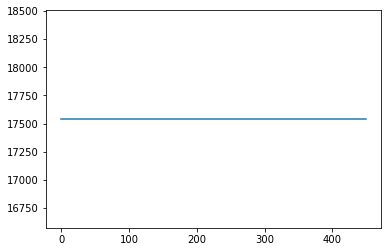

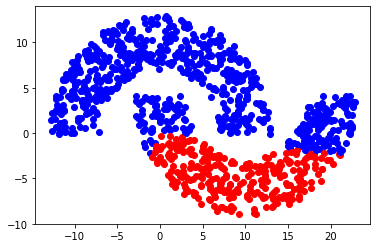

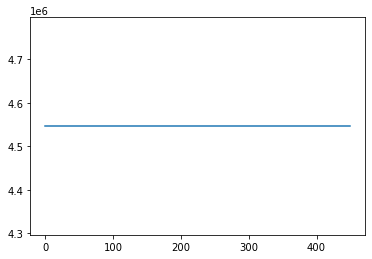

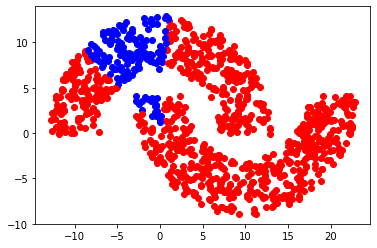

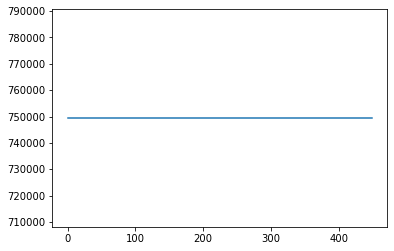

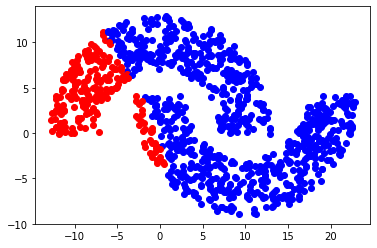

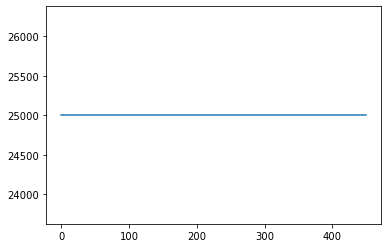

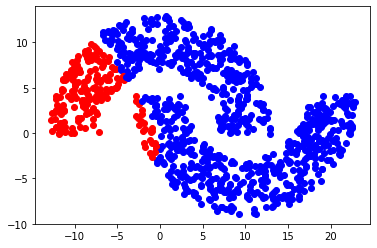

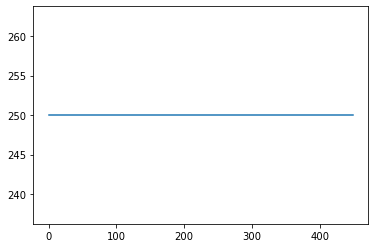

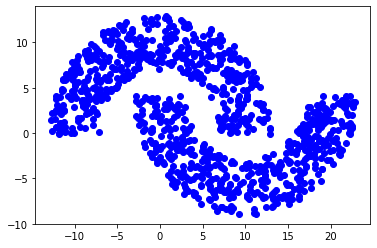

In [34]:
# Problem 8
for i in range(5):
    hidden_layer_perc(450, 0.09, 2, "RelU")

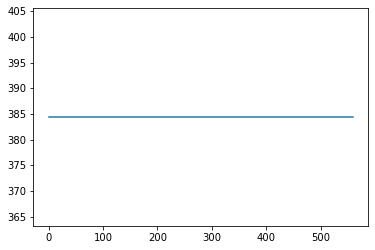

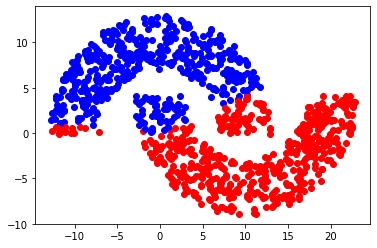

In [43]:
# Problem 9
hidden_layer_perc(560, 0.05, 5, "sigmoid")

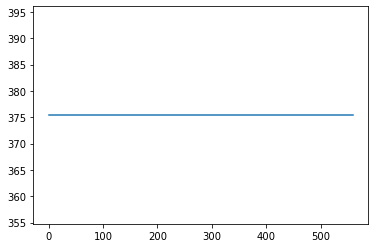

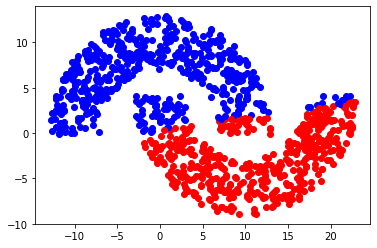

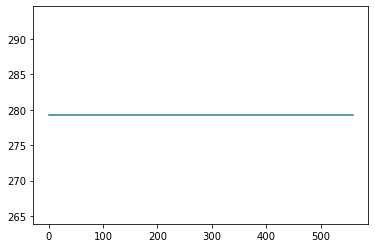

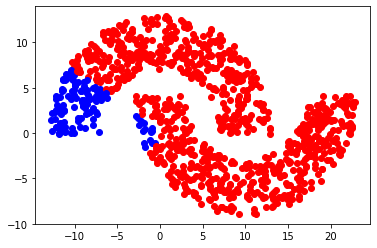

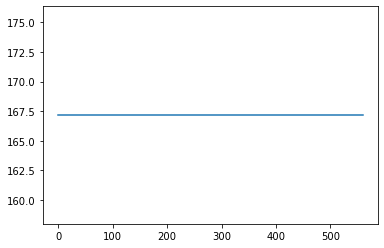

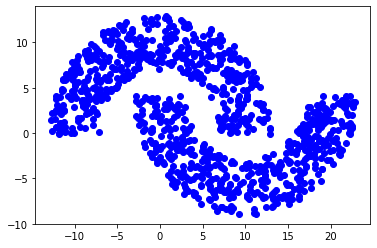

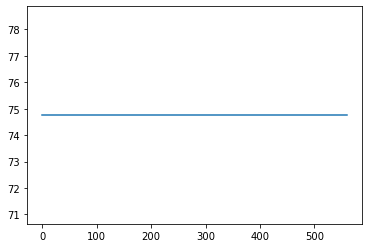

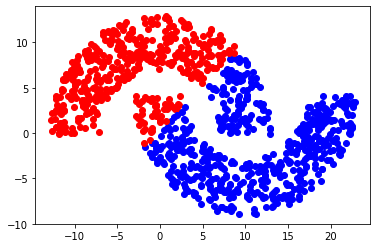

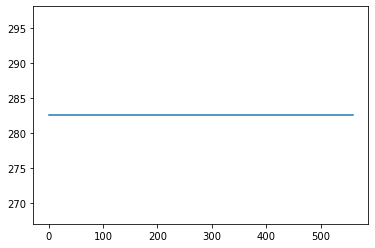

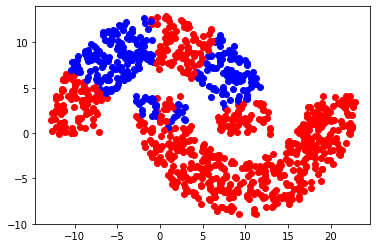

In [44]:
for i in range(5):
    hidden_layer_perc(560, 0.05, 5, "sigmoid")

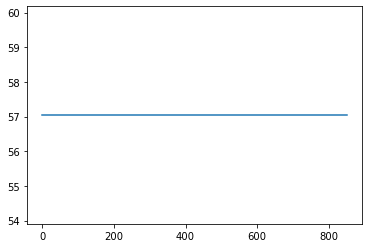

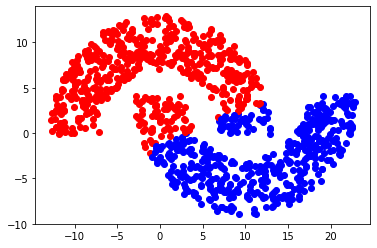

In [49]:
# Problem 10
hidden_layer_perc(850, 0.004, 15, "sigmoid")

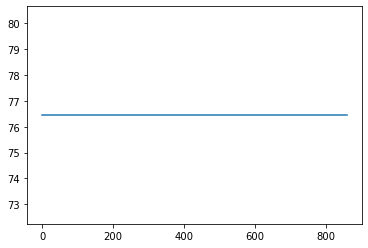

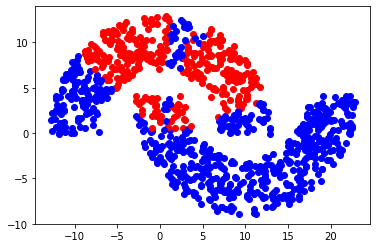

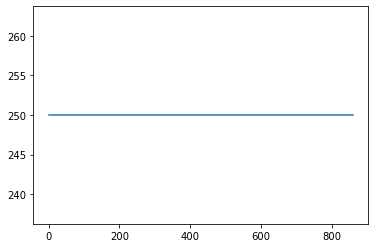

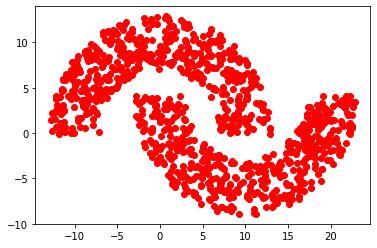

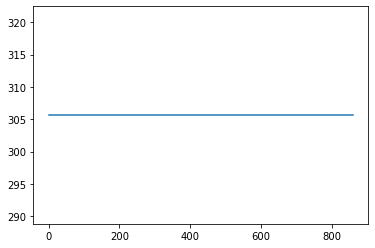

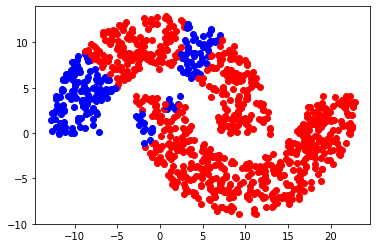

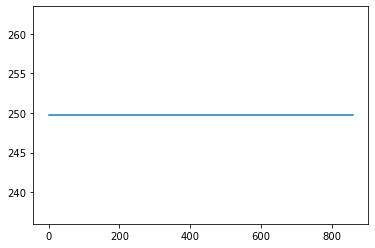

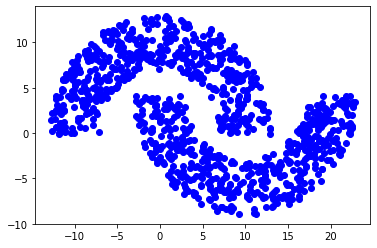

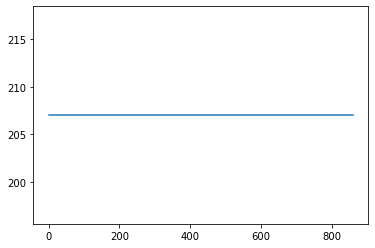

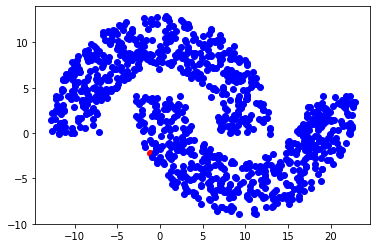

In [51]:
for i in range(5):
    hidden_layer_perc(860, 0.004, 15, "sigmoid")

In [75]:
# Problem 11
# general single layer perceptron 
def two_hidden_layer_perc(epoch, lr, n, fun):
    
    # use data classes
    data = []
    desired = []
    Loss = []
    epoch_num = []
    A = 1
    B = 0
    for i in range(500):
        data.append([x_1[i],y_1[i]])
        desired.append(A)
        data.append([x_2[i],y_2[i]])
        desired.append(B)
    w1 = []
    w2 = []
    w3 = []
    
    output = []
    y_hat = []
    h1_hat = []
    h1 = []
    h2_hat = []
    h2 = []    
    # initialize network
    for i in range(n):
        w3.append(uniform(-5, 5))
        
    for j in range(2):
        x = []
        y = []
        for i in range(n):
            x.append(uniform(-5, 5))
        w1.append(x)
        
    for j in range(n):
        x = []
        y = []
        for i in range(n):
            x.append(uniform(-5, 5))      
        w2.append(x)

    # training loop
    for l in range(epoch): 
        # forward propagation
        for i in range(len(data)):
            inputx = data[i]
            layer1 = []
            sig1 = []
            layer2 = []
            sig2 = []
            for i in range(len(w2)):
                signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
                sig1.append(signal)
                layer1.append(f(signal, fun))
                
            for i in range(len(w3)):
                signal = 0
                for j in range(len(w2)):
                    signal += w2[j][i]*layer1[j]
                sig2.append(signal)
                layer2.append(f(signal, fun))           
            res = 0
            for i in range(len(w3)):
                res+=layer2[i]*w3[i]
            out = f(res, fun)
            output.append(out)
            y_hat.append(res)
            h1.append(layer1)
            h1_hat.append(sig1)
            h2.append(layer2)
            h2_hat.append(sig2)
            
        # backward propagation
        for i in range(len(data)):
            loss = 0
            error = desired[i] - output[i]
            delta3 = der_f(res, fun)*error

            for j in range(len(w3)):
                w3[j] = w3[j] + lr*h2[i][j]*delta3

            for j in range(len(w2[0])):
                delta2 = delta3*w3[j]*der_f(h2_hat[i][j], fun)
                for k in range(len(w1)):
                    w2[k][j] = w2[k][j] + lr*h1[i][k]*delta2
            
            for j in range(len(w1[0])):
                delta1 = 0
                for k in range(len(w2[0])):
                    delta1 += delta2*w2[j][k]*der_f(h1_hat[i][j], fun)
                for k in range(len(w1)):
                    w1[k][j] = w1[k][j] + lr*data[i][k]*delta1

        # caclulate loss at this epoch
        loss = 0
        loss += (sum([0.5*(desired[i]-output[i])**2 for i in range(len(desired))]))
        Loss.append(loss)
        epoch_num.append(l)

    plot2 = plt.figure(2)
    plt.plot(epoch_num, Loss, linestyle='solid' )
    plt.show()
    
    # print data
    if fun == "sigmoid":
        limit = 0.5
    else:
        limit = 0
    for i in range(len(data)):
        if output[i] > limit:
            plt.scatter(data[i][0],data[i][1], color ='red')
        else:
            plt.scatter(data[i][0],data[i][1], color ='blue')
    

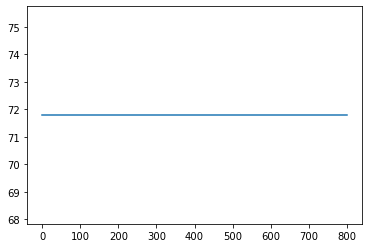

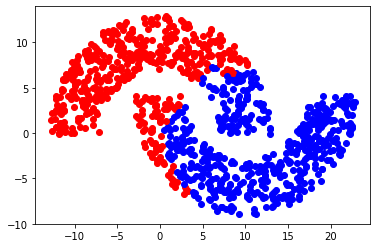

In [90]:
two_hidden_layer_perc(800, 0.006, 5, "sigmoid")

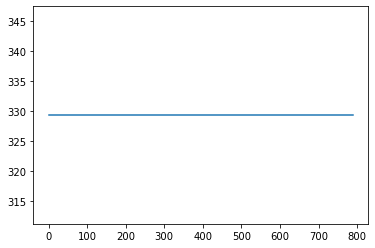

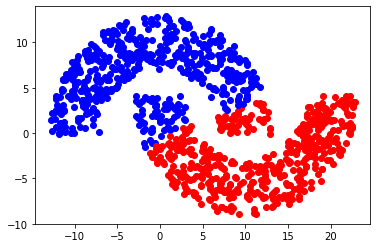

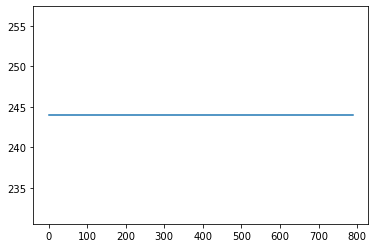

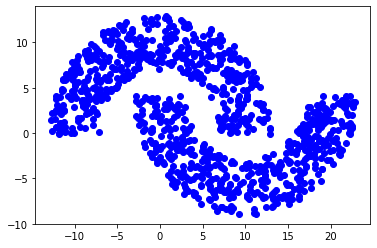

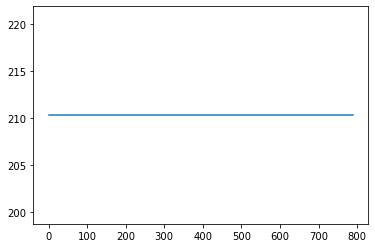

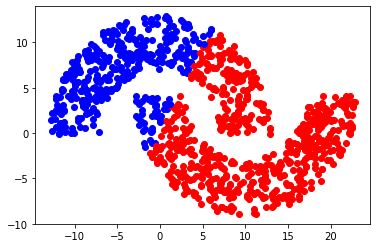

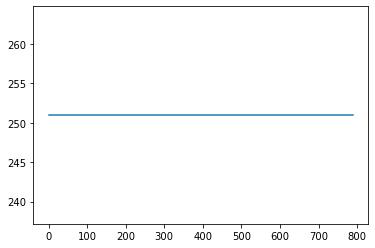

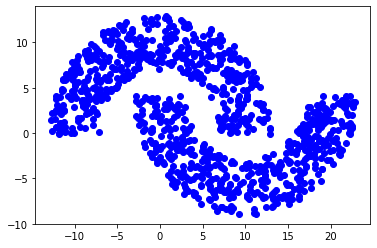

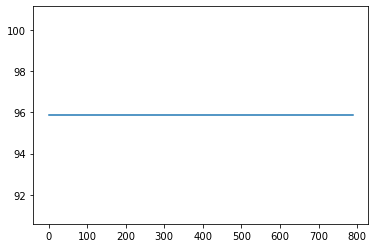

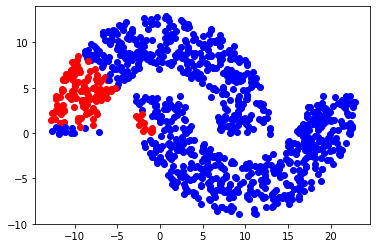

In [92]:
for i in range(5):
    two_hidden_layer_perc(790, 0.006, 5, "sigmoid")

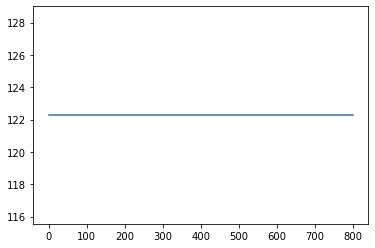

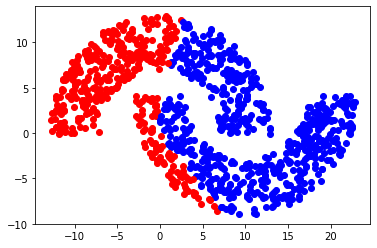

In [100]:
# Problem 11
two_hidden_layer_perc(800, 0.004, 10, "sigmoid")

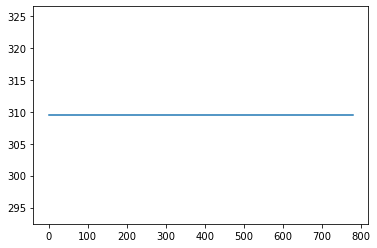

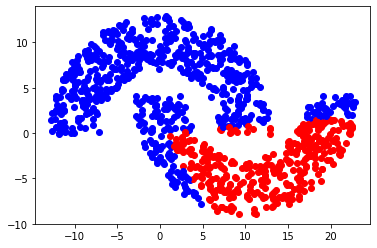

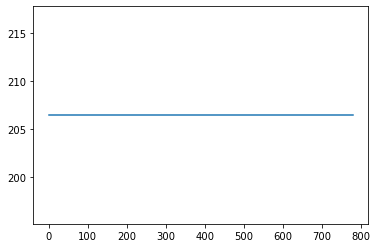

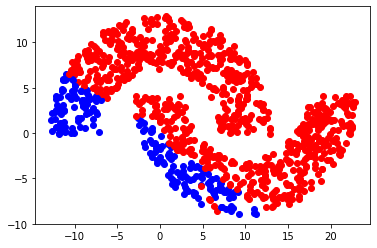

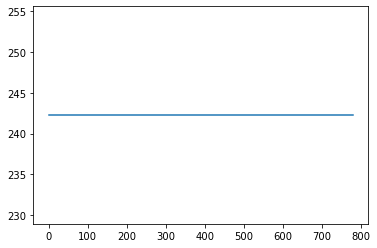

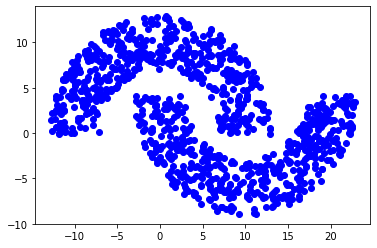

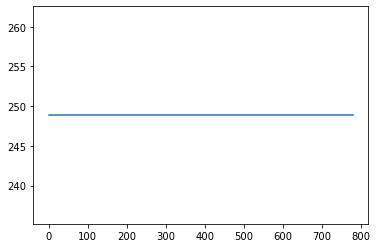

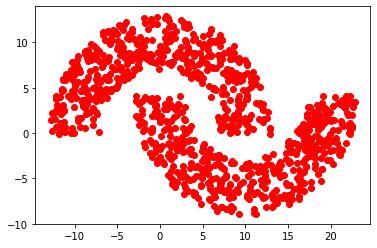

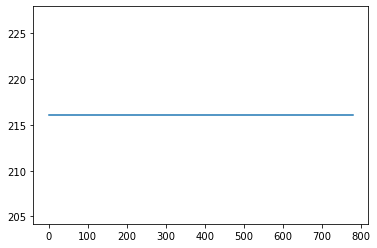

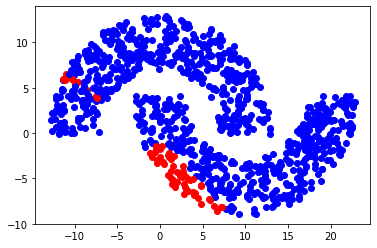

In [102]:
for i in range(5):
    two_hidden_layer_perc(780, 0.004, 10, "sigmoid")